In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_style('whitegrid')

**Check the head of customers, and check out its info() and describe() methods.**

In [48]:
df = pd.read_csv('delivery_time.csv')
df.head(20)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Delivery Time and Sorting Time columns. Does the correlation make sense?**

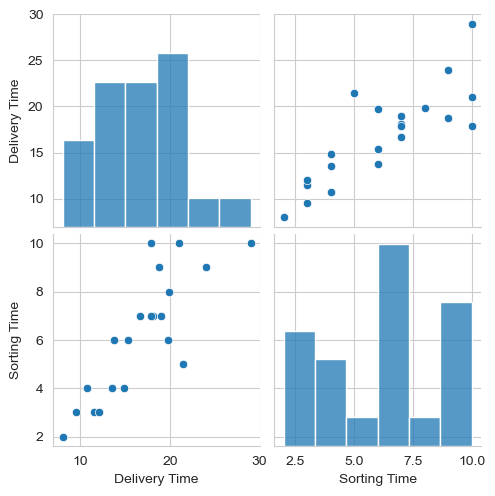

In [7]:
sns.pairplot(df)

In [51]:
df1=df.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

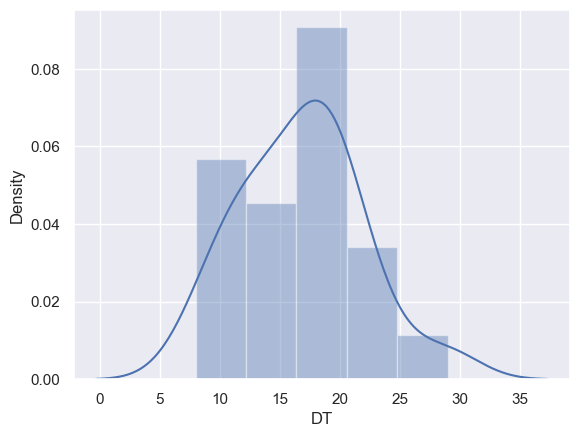

In [53]:
sns.distplot(df1['DT'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

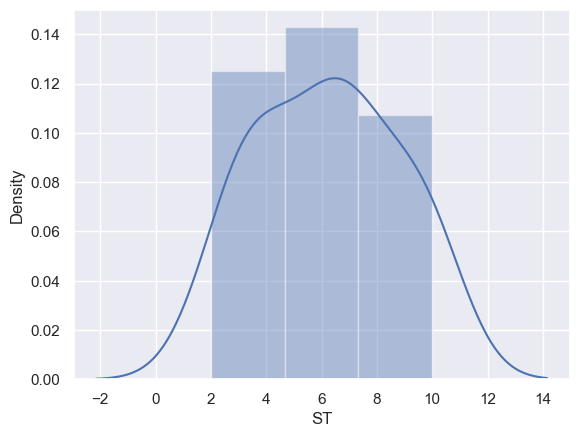

In [54]:
sns.distplot(df1['ST'])

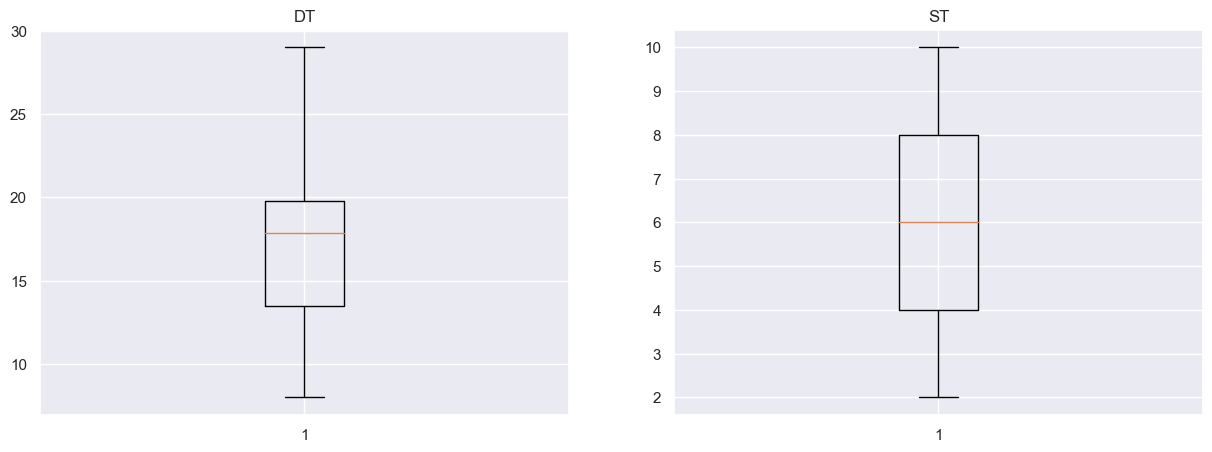

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(df1['DT'])
plt.title("DT")
plt.subplot(1,2,2)
plt.boxplot(df1['ST'])
plt.title("ST")
plt.show()


Text(0.5, 1.0, 'Boxplot')

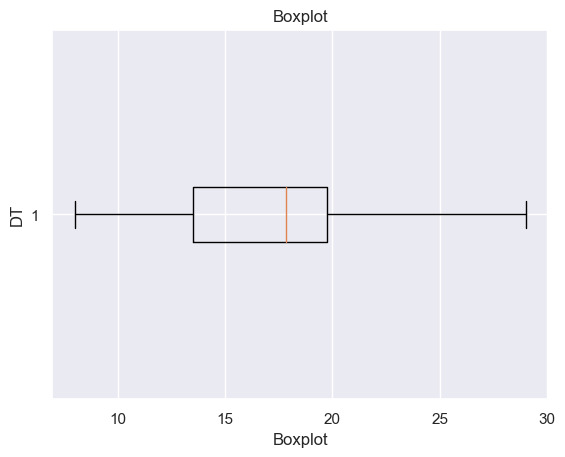

In [56]:
# vertical Boxplot
plt.boxplot(df1['DT'],vert=False)
plt.ylabel("DT")
plt.xlabel("Boxplot")
plt.title("Boxplot")

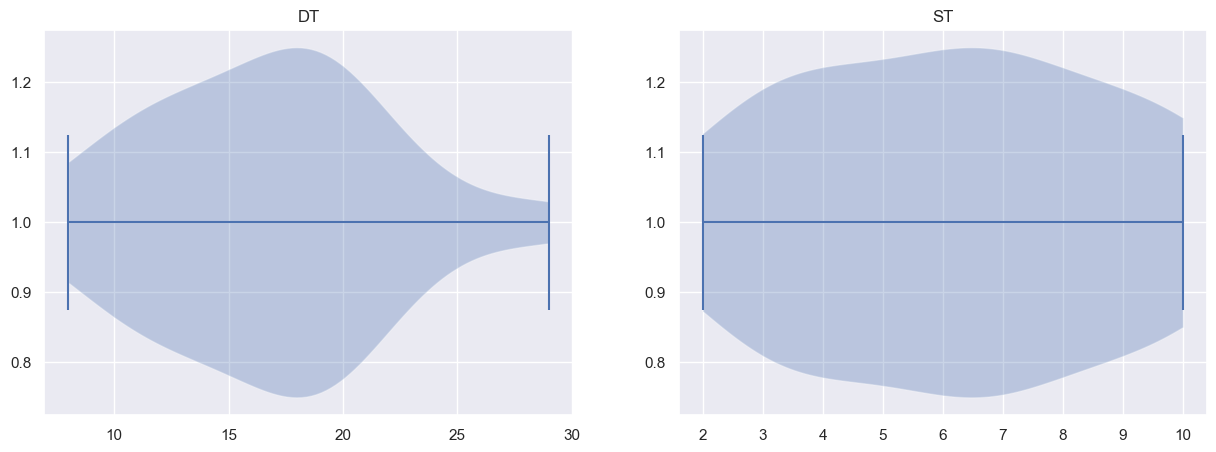

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.violinplot(df1['DT'],vert=False)
plt.title("DT")
plt.subplot(1,2,2)
plt.violinplot(df1['ST'],vert=False)
plt.title("ST")
plt.show()

In [58]:
df1.corr().style.background_gradient(cmap='coolwarm')

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


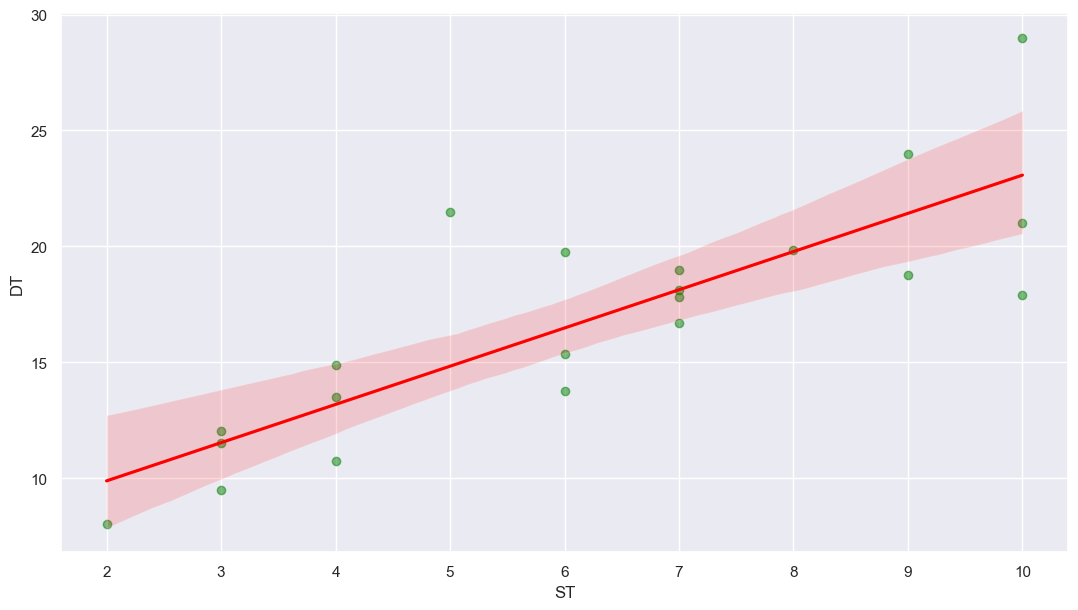

In [59]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="ST", y="DT", data=df1, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

In [61]:
x = df1[['DT']]
y = df1[['ST']]


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
print(lm.intercept_)

[-0.51990077]


In [65]:
lm.coef_

array([[0.40717318]])

In [67]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf.head()

,Coefficient
DT,0.407173


In [69]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

0.8612611700108512

In [71]:
y_pred

array([[3.34824444],
       [2.73748467],
       [7.52176954],
       [9.25225555],
       [4.97693716],
       [5.07873046],
       [6.73999703]])

In [70]:
y_test

,ST
7,3
18,2
2,6
3,9
1,4
16,6
19,7


Text(0, 0.5, 'Predictions')

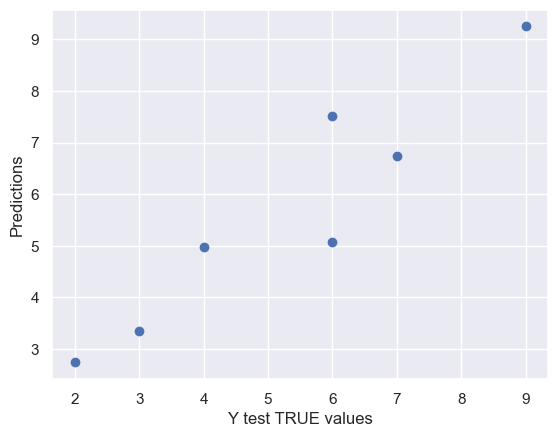

In [72]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y test TRUE values')
plt.ylabel('Predictions')

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

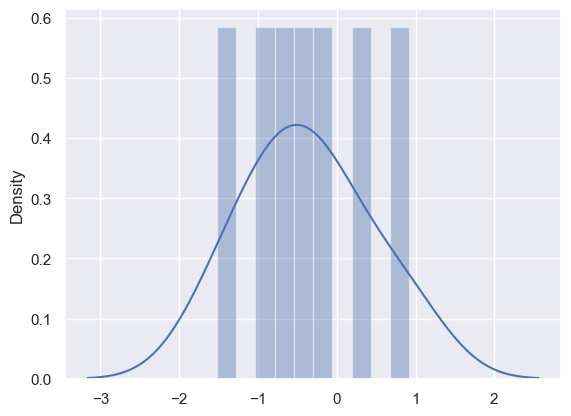

In [82]:
sns.distplot((y_test-y_pred),bins=10)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [78]:
from sklearn import metrics
# calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7168519820640497
MSE: 0.7021883640267124
RMSE: 0.8379668036543646


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

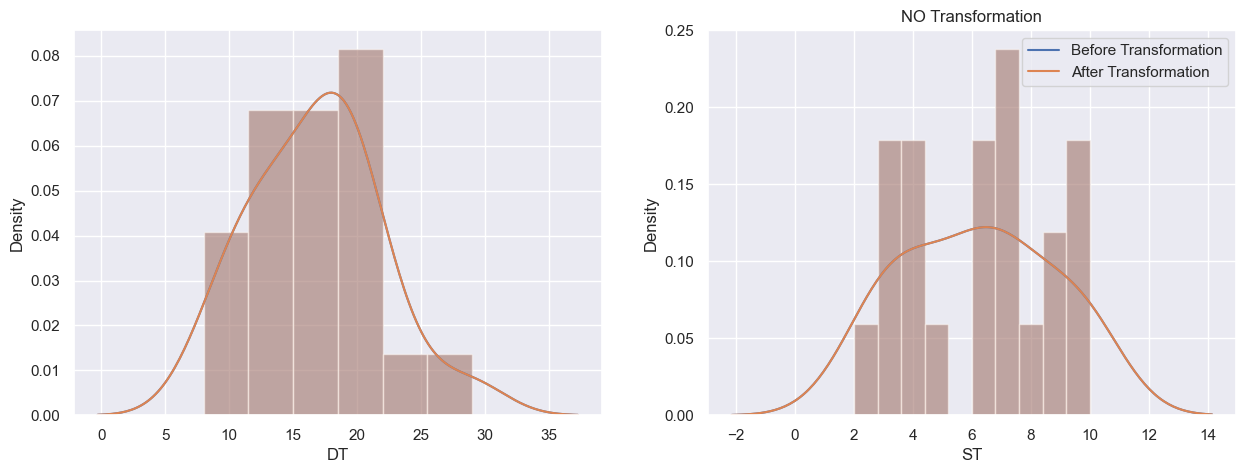

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.title("NO Transformation",loc='center')
sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation",loc='center')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Log Transformation')

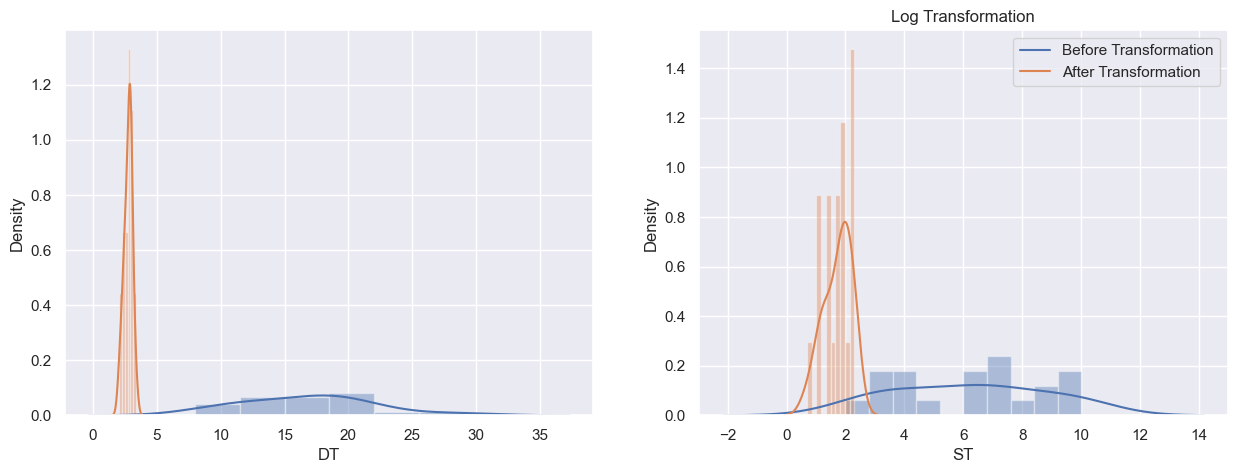

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df1['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.log(df1['DT']), bins = 6, kde = True, ax=axes[0])

sns.distplot(df1['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(df1['ST']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

In [94]:
import statsmodels.formula.api as smf
model_reg = smf.ols("DT~ST",data = df1).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        22:24:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""